# Problem 10, chapter 3

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import statsmodels.stats as sm
from statsmodels.stats.anova import anova_lm
import itertools

In this first part, we are going to read the dataframe that will be used and make an exploratory data analysis. The objective of this part is to get familiarized with the information, change data type if applied and to observe how variables are behaving in relation to the target variable.

In [4]:
df = pd.read_csv("../../db/Carseats.csv")
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [5]:
# Evaluate dataframe, EDA
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


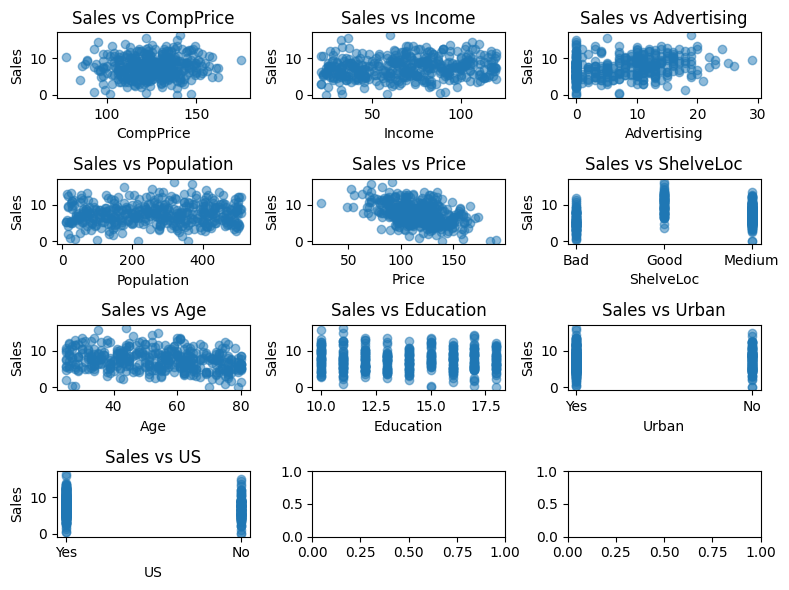

In [12]:
# Visualize all combinatios of variables with target variable
fig, axes = plt.subplots(4, 3, figsize=(8,6))
axes = axes.flatten()
columns = df.columns.tolist()
combinations = [(col, "Sales") for col in columns if col != "Sales"]

for idx, (col1, col_sales) in enumerate(combinations):
    axes[idx].scatter(df[col1], df[col_sales], alpha=0.5)
    axes[idx].set_xlabel(col1)
    axes[idx].set_ylabel("Sales")
    axes[idx].set_title(f"Sales vs {col1}")

plt.tight_layout()
plt.show()

In [23]:
# Analyze the correlation between each variable and Sales
df[df.select_dtypes(include=["int64", "float64"]).columns].corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In this case, since we are only trying to identify the relationship between each variable and Sales, we are going to pay attetion to the first columns. We are able to identify that the principal related columns are advertising, age, and price (in magnitude); income is important but not that much as the others mentioned.

Since the problem asks us to fit a multiple linear regression with the explicative variables stablished, we are going to make it that way. Another way, would be to make a forward validation, for example. The problem of selecting the correct variables is something out of the purpose of this exercise.

## Fit linear regression

In [27]:
# Use price, urban and us for linear regression
# First, I'm going to evaluate all unique values for this categorial columns
unique_urban = df["Urban"].unique()
unique_us = df["US"].unique()
print(f"Unique for Uban: {unique_urban} and unique for US: {unique_us}")

Unique for Uban: ['Yes' 'No'] and unique for US: ['Yes' 'No']


Since there are only to possible values for this columns, we are able to use a dummy variable (I'm meaning a boolean columns) to fit the linear regression.